In [1]:
#Building off of Basic_Stuff.py, this code uses a simple Support Vector Machine to
#classify the images.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load training data into dataframe
df_train = pd.read_csv('Kaggle_Data/train.csv',header =0)
#Load testing data into dataframe
df_test = pd.read_csv('Kaggle_Data/test.csv',header =0)

In [4]:
#Remove features to obtain ids only
id_species_train = df_train[['id','species']]
id_species_test = df_test[['id']]

In [6]:
import os
import skimage as ski
from skimage import io
from skimage import data

In [7]:
#Load a a single image using scikit-image
singleim = io.imread('Kaggle_Data/images/1.jpg')

In [8]:
master_im_train = []
master_im_test = []
#Load all images using scikit-image
for idnum in id_species_train['id']:
    master_im_train.append(io.imread('Kaggle_Data/images/%d.jpg' % (idnum)))

for idnum in id_species_test['id']:
    master_im_test.append(io.imread('Kaggle_Data/images/%d.jpg' % (idnum)))

#Confusing point:
#These are lists of arrays. At the moment, we can make these into arrays of arrays,
#however, each array of arrays will have shape (990,), i.e. we can't make it into
#a proper multidimensional array because each element is a different size. We will
#make this into said array below.


In [9]:
#Access pixel value (134,240) in the third image in training set
master_im_train[2][134,240]

0

In [10]:
##There are other values than 0 (black) and 255 (white)
##So we apply a mask to each image. This is probably not necessary,
##but the data will look nicer.
#for iindex,i in enumerate(master_im_train):
#    mask = master_im_train[iindex]<100
##Set to "black" (0) pixels where mask is true
#    master_im_train[iindex][mask] = 0
#
#    mask = master_im_train[iindex]>100
##Set to "white" (255) pixels where mask is true
#    master_im_train[iindex][mask] = 255

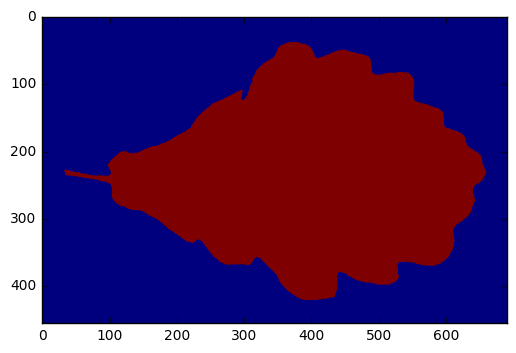

In [11]:
#Plot the third image in the training set
plt.imshow(master_im_train[2])
plt.show()

In [12]:
#Import Support Vector Machine code from sklearn
from sklearn import svm
clf = svm.SVC(gamma = .001, C = 100.)

In [23]:
#This will make all the images the same size. We can be pretty 
#certain that this is not going to yield good results, but will
#get us started. 

from skimage.transform import resize

for iindex, i in enumerate(master_im_train):
    master_im_train[iindex]= ski.transform.resize(i,(100,100))

#Now we can convert master_im_train to an multidimensional array
master_im_train=np.array(master_im_train)

for iindex, i in enumerate(master_im_test):
    master_im_test[iindex]= ski.transform.resize(i,(100,100))

#Now we can convert master_im_test to an multidimensional array
master_im_test=np.array(master_im_test) 

In [24]:
#We need to reorganize master_im_train so that the individual features 
#(i.e. 1st pixel, 2nd pixel, etc.) from each image
#are grouped together for clf.fit

#The feature list to plug into clf.fit:
im_train_fit = []

for i in master_im_train:
    im_train_fit.append(i.flatten())

im_train_fit = np.array(im_train_fit)

#The feature list to plug into clf.predict:
im_train_predict = []

for i in master_im_test:
    im_train_predict.append(i.flatten())

im_train_predict = np.array(im_train_predict)

In [19]:
#Fit the data to the SVM
clf.fit(im_train_fit,id_species_train['species'])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
#Predict which plant belongs to what leaf using the SVM
testout = clf.predict(im_train_predict)

In [30]:
#Collect ids of images with predictions
prediction = pd.DataFrame({'id':id_species_test['id'], 'prediction':testout})

In [34]:
#Put everything in alphabetical order for easy comparisons
id_species_train_alph = id_species_train.sort_values(['species'])
prediction_alph = prediction.sort_values(['prediction'])

In [39]:
#This is code taken from stackoverflow that allows us to display
#two pandas dataframes side by side in jupyter
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}

"""

HTML('<style>{}</style>'.format(CSS))

In [40]:
display(id_species_train_alph)
display(prediction_alph)

,id,species
111,201,Acer_Capillipes
951,1525,Acer_Capillipes
370,610,Acer_Capillipes
126,227,Acer_Capillipes
859,1377,Acer_Capillipes
347,569,Acer_Capillipes
976,1562,Acer_Capillipes
624,990,Acer_Capillipes
304,498,Acer_Capillipes
742,1196,Acer_Capillipes


,id,prediction
214,549,Acer_Capillipes
539,1430,Acer_Capillipes
237,607,Acer_Capillipes
322,845,Acer_Capillipes
334,902,Acer_Capillipes
579,1540,Acer_Capillipes
24,68,Acer_Circinatum
84,192,Acer_Circinatum
297,775,Acer_Circinatum
2,9,Acer_Circinatum
